In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

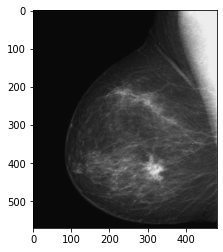

In [2]:
# Passando a imagem para uma variável
imagem_original=Image.open('mamografia.tif')

# Utilizando matplotlib para "plotar" a imagem
plt.imshow(imagem_original, cmap='gray')

# Convertendo a imagem para um numpy.array
imagem_array=np.asarray(imagem_original)

In [3]:
def equalizacao_histograma(imagem):
    """
    Função que fará a equalização do histograma de uma dada imagem.
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem a ser equalizado
    
    Return
    -----------
    imagem_equalizada: numpy.array
        A imagem equalizada com as dimensões do array passado nos parâmetros
    
    """
    # Soma dos valores do histograma
    img_hist, barras=np.histogram(imagem.flatten(), 256)
    # Funcao de distribuicao cumulativa
    hist_cumsum=img_hist.cumsum()
    # Normalizacao dos valores
    hist_cumsum=(255*hist_cumsum) / hist_cumsum[-1]
    
    # Pegando os valores da soma cumulativa, ou seja, os valores normalizados, para cada indice em imagem.flatten()
    imagem_equalizada=np.interp(imagem.flatten(), barras[:-1], hist_cumsum)
    
    return imagem_equalizada.reshape(imagem.shape)

In [4]:
imagem_equalizada=equalizacao_histograma(imagem_array)

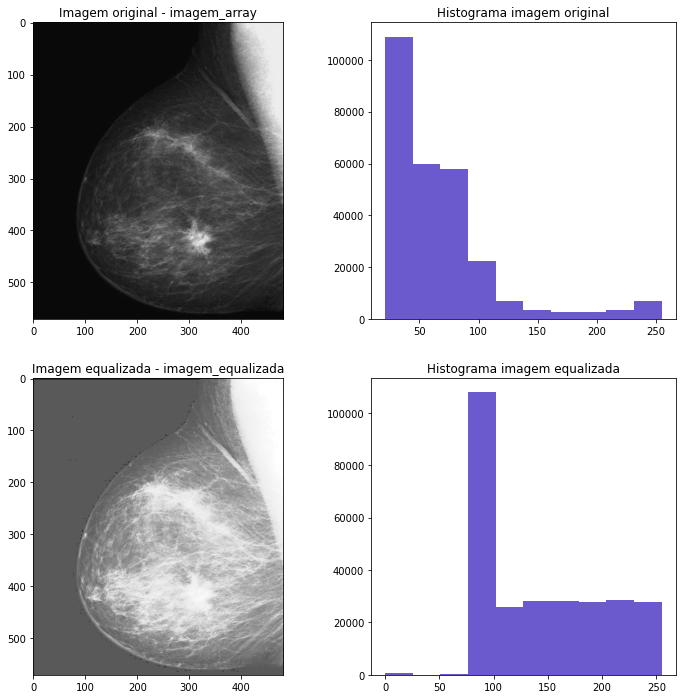

In [5]:
# Plottando a comparação entre as imagens com seus histogramas
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].imshow(imagem_array, cmap='gray')

ax[1,0].imshow(imagem_equalizada, cmap='gray')

ax[0,1].hist(imagem_array.flatten(), color='slateblue')

ax[1,1].hist(imagem_equalizada.flatten(), color='slateblue')

titulos=['Imagem original - imagem_array',
         'Histograma imagem original',
         'Imagem equalizada - imagem_equalizada',
         'Histograma imagem equalizada']

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc='center')

In [8]:
# Código para salvar a imagem e disponibilizá-la no relatório
fig.savefig('hist_equal.png')